In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('var 2 Credit Card Customer Data.csv')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [4]:
#проверим, есть ли пропуски
df.isnull().sum(axis = 0).to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

<AxesSubplot:>

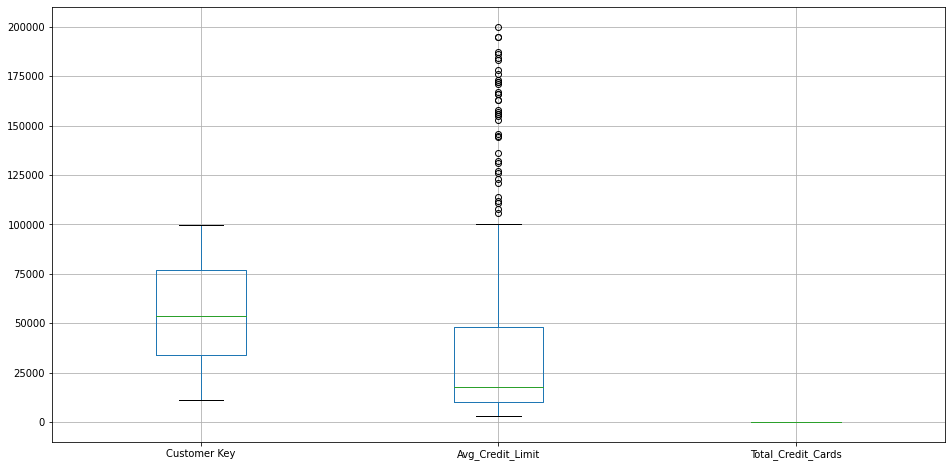

In [5]:
df.boxplot(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards'], figsize = (16, 8))

<AxesSubplot:>

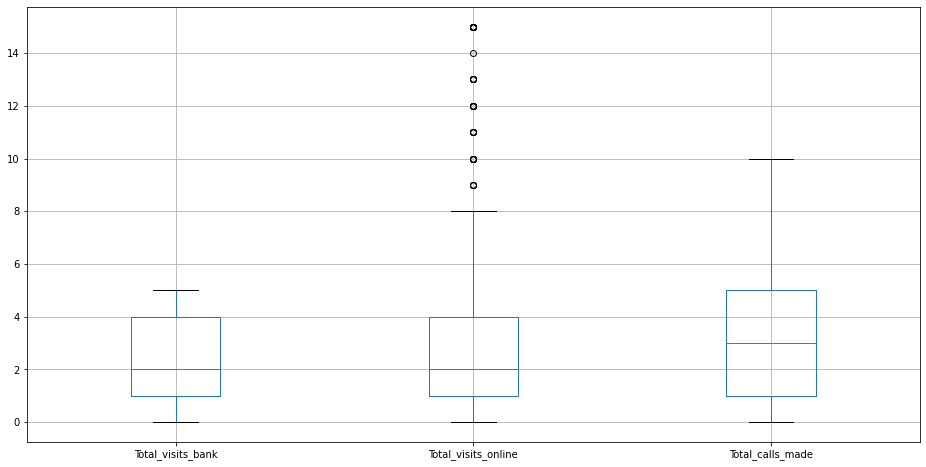

In [6]:
df.boxplot(['Total_visits_bank', 'Total_visits_online', 'Total_calls_made'], figsize = (16, 8))

In [7]:
columns_check = ['Avg_Credit_Limit', 'Total_visits_online']

for column in columns_check:
       for x in [column]:
              q75,q25 = np.percentile(df.loc[:,x],[75,25])
              dif = q75-q25

              max = q75 + (1.5 * dif)
              min = q25 - (1.5 * dif)

              df.loc[df[x] < min, x] = np.nan
              df.loc[df[x] > max, x] = np.nan
    
df.isnull().sum()

Sl_No                   0
Customer Key            0
Avg_Credit_Limit       39
Total_Credit_Cards      0
Total_visits_bank       0
Total_visits_online    37
Total_calls_made        0
dtype: int64

In [8]:
df = df.dropna(axis = 0)
df.isnull().sum().to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

<AxesSubplot:>

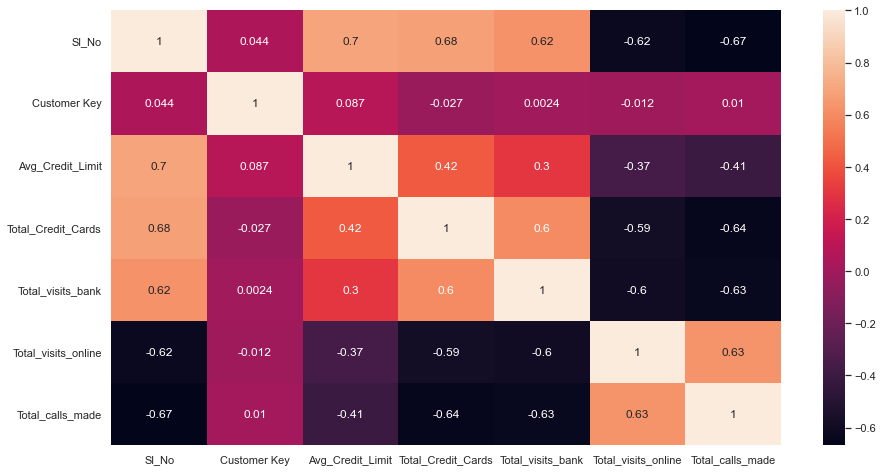

In [9]:
corr_matrix = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, annot=True)

In [10]:
df = df.drop(columns = ['Sl_No', 'Customer Key'])
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000.0,2,1,1.0,0
2,50000.0,7,1,3.0,4
3,30000.0,5,1,1.0,4
5,20000.0,3,0,1.0,8
7,15000.0,3,0,1.0,1
...,...,...,...,...,...
609,38000.0,4,3,2.0,0
610,39000.0,7,2,1.0,0
611,46000.0,7,4,1.0,3
625,91000.0,8,1,6.0,1


k-means

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
data = pd.DataFrame(scaled_features, columns = df.columns)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,611.0,4.651671e-17,1.000819,-1.094880,-0.762129,-0.429378,0.616410,3.516095
Total_Credit_Cards,611.0,4.651671e-17,1.000819,-1.799650,-0.738273,-0.207585,0.853792,2.445857
Total_visits_bank,611.0,9.303342e-17,1.000819,-1.590053,-0.966082,-0.342111,0.905830,1.529800
Total_visits_online,611.0,9.303342e-17,1.000819,-1.215448,-0.585560,0.044329,0.674218,3.823663
Total_calls_made,611.0,-4.651671e-17,1.000819,-1.316473,-0.967508,-0.269577,0.777319,2.173180


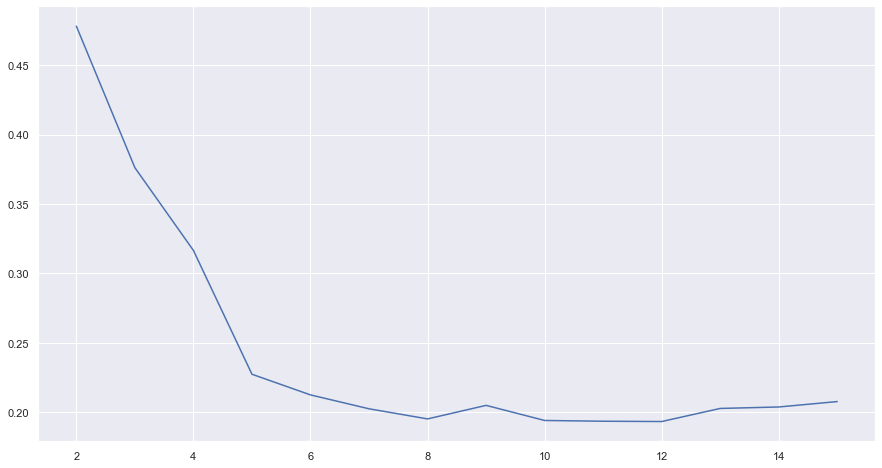

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics  import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import pairwise_distances
 
siluete = []
cal_har = []
dav_boul = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    siluete.append(silhouette_score(data, kmeans.labels_))
    cal_har.append(calinski_harabasz_score(data, kmeans.labels_))
    dav_boul.append(davies_bouldin_score(data, kmeans.labels_))
plt.plot(range(2, 16), siluete)

In [13]:
print('кол кластеров   силуэт                   Калински-Харабаша        Дэвиса-Булдина')
for i in range(len(siluete)):
    print(i+2, siluete[i], cal_har[i], dav_boul[i], sep=' '*10)

кол кластеров   силуэт                   Калински-Харабаша        Дэвиса-Булдина
2          0.47810840518826964          726.9397792510446          0.8166847350997861
3          0.376130422422812          581.0856873171186          1.144365372408483
4          0.3165052037702691          449.2211495837167          1.3363711969021894
5          0.2273137283468318          386.6608998191766          1.5936836516967787
6          0.2124303714786235          342.510523581326          1.6911425187310198
7          0.20242389101933358          307.57981026469696          1.5839133672322931
8          0.1951308066905714          279.8639142514928          1.6094913547927692
9          0.20488695525011993          260.9980094652402          1.523358241017827
10          0.19400657343174402          247.1955289685357          1.5904482572221004
11          0.19345386641572743          236.68417073516434          1.460815829432923
12          0.19323992656530803          228.37135302499146      

In [14]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
kmeans3_metrics= [silhouette_score(data, kmeans.labels_),
                  calinski_harabasz_score(data, kmeans.labels_),
                  davies_bouldin_score(data, kmeans.labels_)]
kmeans3_metrics

[0.47810840518826964, 726.9397792510446, 0.8166847350997861]

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [62.5, 62.5, 100.0, 100.0],
  [32.5, 32.5, 81.25, 81.25],
  [10.0, 10.0, 56.875, 56.875],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [132.5, 132.5, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [146.25, 146.25, 182.5, 182.5],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [205.0, 205.0, 223.75, 223.75],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [270.0, 270.0, 311.25, 311.25],
  [214.375, 214.375, 290.625, 290.625],
  [164.375, 164.

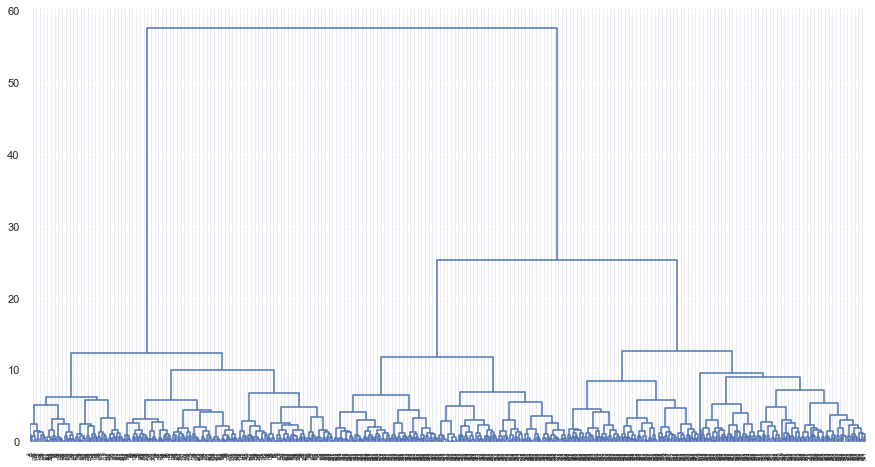

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(data, method = 'ward', metric = 'euclidean')
#method='ward' использует алгоритм минимизации дисперсии Уорда
f = plt.figure(figsize=(15, 8))
dendrogram(Z, labels = data.index, leaf_rotation = 90., color_threshold = 0)

In [16]:
from sklearn.cluster import AgglomerativeClustering

print('n_clusters   силуэт                Калински-Харабаша         Дэвиса-Булдина')
for k in range(2, 16):
    aggl = AgglomerativeClustering(n_clusters=k).fit(data)
    print(k, silhouette_score(data, aggl.labels_), 
          calinski_harabasz_score(data, aggl.labels_),
          davies_bouldin_score(data, aggl.labels_), sep=' '*5)

n_clusters   силуэт                Калински-Харабаша         Дэвиса-Булдина
2     0.47809260706748585     726.0899061888671     0.8157002058589162
3     0.3561565660793064     562.5215261386095     1.1749934461072213
4     0.2861421434831199     421.05237592605664     1.6748549969341044
5     0.1755116692962093     353.7709533888457     1.8897282597730913
6     0.17947416323671458     316.0294777107775     1.785502016329538
7     0.17012632838729397     285.65528913082255     1.728030503699825
8     0.17604257894907205     264.4302839135672     1.5612930347805367
9     0.17526282621502762     248.27694099621752     1.5392269706306492
10     0.17641185149775612     235.75240581952238     1.5320487919720231
11     0.1786881428591203     222.84226229151588     1.4950458246802285
12     0.17026427314096437     212.3022243573082     1.5267891388281294
13     0.16738575409418166     203.73355206492192     1.4795439611948242
14     0.16381858304865957     196.2844003557715     1.4966957251390

In [17]:
aggl = AgglomerativeClustering(n_clusters=2).fit(data)
aggl3_metrics = [silhouette_score(data, aggl.labels_), 
                 calinski_harabasz_score(data, aggl.labels_),
                 davies_bouldin_score(data, aggl.labels_)]
aggl3_metrics

[0.47809260706748585, 726.0899061888671, 0.8157002058589162]

In [18]:
from sklearn.cluster import MeanShift
ms = MeanShift().fit(data)
print("Clasters:", *set(ms.labels_))
ms_metrics= [silhouette_score(data, ms.labels_),
                  calinski_harabasz_score(data, ms.labels_),
                  davies_bouldin_score(data, ms.labels_)]
ms_metrics

Clasters: 0 1 2


[0.48133660818062285, 391.293090808137, 0.6834502687480447]

In [19]:
print('kmeans:'+' '*16, kmeans3_metrics)
print('MeanShift:             ', ms_metrics)
print('AgglomerativeClustering', aggl3_metrics)

kmeans:                 [0.47810840518826964, 726.9397792510446, 0.8166847350997861]
MeanShift:              [0.48133660818062285, 391.293090808137, 0.6834502687480447]
AgglomerativeClustering [0.47809260706748585, 726.0899061888671, 0.8157002058589162]


In [20]:
from sklearn.decomposition import PCA

pca = PCA()
data_new = pca.fit_transform(data)
data_new

array([[-1.04641305,  3.34285561, -1.44292182, -0.75301321, -1.43658116],
       [-0.24350554,  1.46552096,  0.93594991,  1.22774835,  0.13627094],
       [-0.00718078,  0.40325978, -0.59660912,  0.94920011,  0.05352028],
       ...,
       [-1.79306474,  0.38218616,  0.46073749,  0.15212635,  0.67616577],
       [-0.77929714,  3.45587821,  2.72559166,  0.87862655, -0.94707639],
       [-0.10112552,  4.22164084,  3.8181194 ,  1.37919482, -0.95088319]])

In [21]:
pca.explained_variance_ratio_

array([0.6230532 , 0.1508384 , 0.08202209, 0.07659273, 0.06749359])

In [22]:
np.sum(pca.explained_variance_ratio_)

0.9999999999999998

In [23]:
pca = PCA(n_components=2)
data_new = pca.fit_transform(data)
data_new

array([[-1.04641305,  3.34285561],
       [-0.24350554,  1.46552096],
       [-0.00718078,  0.40325978],
       ...,
       [-1.79306474,  0.38218616],
       [-0.77929714,  3.45587821],
       [-0.10112552,  4.22164084]])

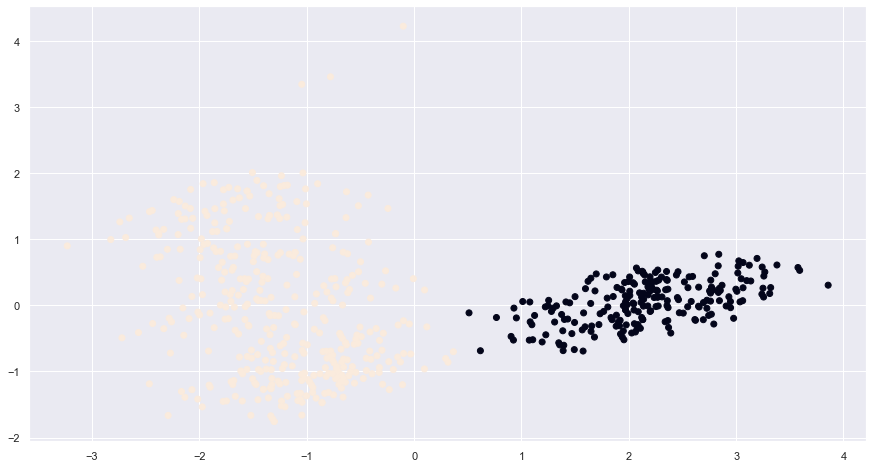

In [24]:
plt.scatter(data_new.T[0],data_new.T[1] ,c=kmeans.labels_)

In [25]:
pca.explained_variance_ratio_

array([0.6230532, 0.1508384])

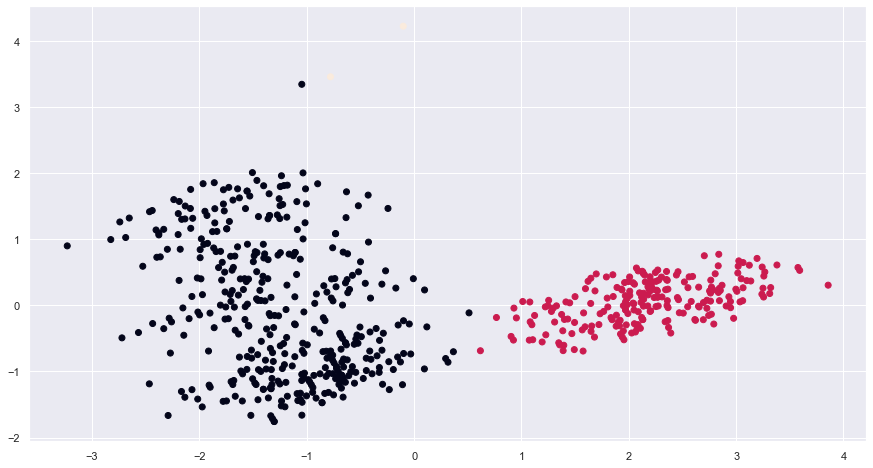

In [26]:
plt.scatter(data_new.T[0],data_new.T[1] ,c=ms.labels_)

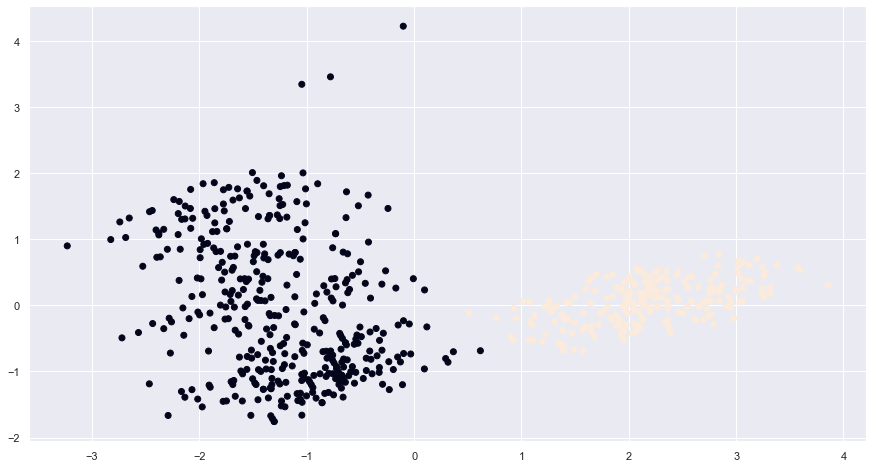

In [27]:
plt.scatter(data_new.T[0],data_new.T[1] ,c=aggl.labels_)